## Dictionaries

The second major Python data structure is the dictionary. As you probably recall, dictionaries differ from lists in that you can access items in a dictionary by a key rather than a position.

The thing that is most important to notice right now is that the get item and set item operations on a dictionary are $O(1)$. Another important dictionary operation is the contains operation. Checking to see whether a key is in the dictionary or not is also $O(1)$. The efficiency of all dictionary operations is summarized in Table below. One important side note on dictionary performance is that the efficiencies we provide in the table are for average performance. In some rare cases the contains, get item, and set item operations can degenerate into $O(n)$ performance



## Big-O Efficiency of Average Dictionary Operations


| Operation | Big-O Efficiency |
| --- | --- |
| `copy` | $O(n)$ |
| `get item` | $O(1)$ |
| `set item` | $O(1)$ |
| `delete item` | $O(1)$ |
| `iteration` | $O(n)$ |
| `contains (in)` | $O(1)$ |



**List and Dictionary `contains (in)` Experiment:**

We will compare the performance of the contains operation between lists and dictionaries. In the process we will confirm that the contains operator for lists is $O(n)$ and the contains operator for dictionaries is $O(1)$.

The experiment we will use to compare the two is simple. We’ll make a list with a range of numbers in it. Then we will pick numbers at random and check to see if the numbers are in the list. If our performance tables are correct the bigger the list the longer it should take to determine if any one number is contained in the list.

We will repeat the same experiment for a dictionary that contains numbers as the keys. In this experiment we should see that determining whether or not a number is in the dictionary is not only much faster, but the time it takes to check should remain constant even as the dictionary grows larger.

In [1]:
from random import randrange
import time, timeit
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def list_dict_comparison():
    """Compares the contain (in) operation
        on lists and dictionaries. 
        
    @return: two lists with the time for a list
            and dictionary
    """
    list_time = []
    dict_time = []
    count = 0
    
    for i in range(300000, 9000001, 300000):
        lyst = list(range(i))
        dict_ = {j:j for j in range(i)}
        rrand = randrange(30000000)
        start = time.time()
        rrand in lyst
        list_time.append(round(time.time()-start, 3))
        start = time.time()
        rrand in dict_
        dict_time.append(round(time.time()-start, 3))
        
        print('List: %5.3f ; Dict: %5.3f' %(list_time[count], dict_time[count]))
        count+=1
        
    return list_time, dict_time

In [3]:
list_time, dict_time = list_dict_comparison()

List: 0.017 ; Dict: 0.000
List: 0.019 ; Dict: 0.000
List: 0.029 ; Dict: 0.000
List: 0.039 ; Dict: 0.000
List: 0.051 ; Dict: 0.000
List: 0.060 ; Dict: 0.000
List: 0.070 ; Dict: 0.000
List: 0.089 ; Dict: 0.000
List: 0.088 ; Dict: 0.000
List: 0.096 ; Dict: 0.000
List: 0.117 ; Dict: 0.000
List: 0.194 ; Dict: 0.000
List: 0.149 ; Dict: 0.000
List: 0.153 ; Dict: 0.000
List: 0.090 ; Dict: 0.000
List: 0.166 ; Dict: 0.000
List: 0.173 ; Dict: 0.000
List: 0.188 ; Dict: 0.000
List: 0.185 ; Dict: 0.000
List: 0.210 ; Dict: 0.000
List: 0.229 ; Dict: 0.000
List: 0.251 ; Dict: 0.000
List: 0.238 ; Dict: 0.000
List: 0.241 ; Dict: 0.000
List: 0.333 ; Dict: 0.000
List: 0.276 ; Dict: 0.000
List: 0.295 ; Dict: 0.000
List: 0.298 ; Dict: 0.000
List: 0.296 ; Dict: 0.000
List: 0.306 ; Dict: 0.001


In [4]:
def plotLines(*args, title=None, names=[]):
    """Plot lines from respective arrays
    """
    size = len(args[0])
    for arr in args:
        assert len(arr) == size, 'Each Item Must Have Same Len'
        
    df_list = [lyst for lyst in args]
    df = pd.DataFrame(df_list).T
    df.columns = names
    df.plot()
    plt.title(title, fontweight='bold')

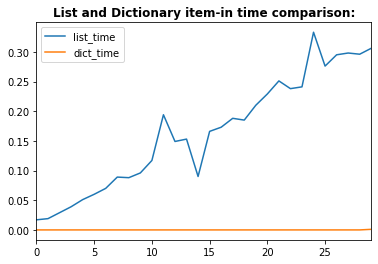

In [5]:
title = 'List and Dictionary item-in time comparison:'
names = ['list_time', 'dict_time']
plotLines(list_time, dict_time, title=title, names=names)

We can see that generally as the list length increases, the time to find the item also increases $O(n)$, while generally the time to find the item in a dictionary key remains constant $O(1)$.

You can see that the dictionary is consistently faster. For the smallest list size of 10,000 elements a dictionary is 89.4 times faster than a list. You can also see that the time it takes for the contains operator on the list grows linearly with the size of the list. This verifies the assertion that the contains operator on a list is $O(n)$. It can also be seen that the time for the contains operator on a dictionary is constant even as the dictionary size grows. In fact for a dictionary size of 10,000 the contains operation took 0.004 milliseconds and for the dictionary size of 990,000 it also took 0.004 milliseconds too.

**The only dictionary operations that are not $O(1)$ are those that require iteration.**

## Summary

Algorithm analysis is an **implementation-independent** way of measuring an algorithm.

**`Big-O notation`** allows algorithms to be classified by their dominant process with respect to the size of the problem.


### Exercises

In [6]:
# Give the Big-O performance of the following code fragment:
n = 10

for i in range(n):
    for j in range(n):
        k = 2 + 2

The $Big-O$ performance above is $O(n*n)$ = $O(n^2)$ due to the nested loop that runs through $n$ for each step of the outer loops $n$

In [7]:
# Give the Big-O performance of the following code fragment:

for i in range(n):
     k = 2 + 2

The $Big-O$ performance above is $O(n+1)$ = $O(n)$ due to the loop that runs through $n$ 

In [8]:
# Give the Big-O performance of the following code fragment:

i = n
while i > 0:
    k = 2 + 2
    i = i // 2

The $Big-O$ performance above is $O(log(n)+2)$ = $O(log(n))$ due to the fact that $n$ is cut in half each time of the iteration

In [9]:
# Give the Big-O performance of the following code fragment:

for i in range(n):
    for j in range(n):
        for k in range(n):
            k = 2 + 2

The $Big-O$ performance above is $O(n*n*n+1)$ = $O(n^3)$ or $n$ cubed, due to the triple nested loop that runs through $n$ each time

In [10]:
# Give the Big-O performance of the following code fragment:

for i in range(n):
    k = 2 + 2
for j in range(n):
    k = 2 + 2
for k in range(n):
    k = 2 + 2

The $Big-O$ performance above is $O(3(1+n))$ = $O(3 + 3n)$ = $O(n)$. Beacuse, as the input grows, the $n$ becomes the dominant factor.

**Programming Exercises**

1. Devise an experiment to verify that the list index operator is $O(1)$

2. Devise an experiment to verify that get item and set item are $O(1)$ for dictionaries.

3. Devise an experiment that compares the performance of the del operator on lists and dictionaries.

4. Given a list of numbers in random order, write an algorithm that works in $O(nlog(n))$ to find the $k$th smallest number in the list. Note that $O(nlog(n))$ in quick-sort simply means doing roughly $n$ comparisons in $log(n)$ steps.

5. Can you improve the algorithm from the previous problem to be linear? Explain.

**1. Devise an experiment to verify that the list index operator is  𝑂(1)**

In [11]:
def list_index_comparison():
    """Experiment to confirm that list-indexing
        is done in constant time O(1)
    @return: a list of time taken to index increasing
            lists length
    """
    
    index_time = []
    
    for i in range(100000, 2000001, 100000):
        lyst = list(range(i))
        rand = randrange(i)
        start = time.time()
        x = lyst[rand]
        duration = time.time()-start
        index_time.append(round(duration, 3))
        
        print('Len: %d, Time: %5.3f'%(i, duration))
        
    return index_time

In [12]:
list_index_time = list_index_comparison()

Len: 100000, Time: 0.000
Len: 200000, Time: 0.000
Len: 300000, Time: 0.000
Len: 400000, Time: 0.000
Len: 500000, Time: 0.000
Len: 600000, Time: 0.000
Len: 700000, Time: 0.000
Len: 800000, Time: 0.000
Len: 900000, Time: 0.000
Len: 1000000, Time: 0.000
Len: 1100000, Time: 0.000
Len: 1200000, Time: 0.000
Len: 1300000, Time: 0.000
Len: 1400000, Time: 0.000
Len: 1500000, Time: 0.000
Len: 1600000, Time: 0.000
Len: 1700000, Time: 0.000
Len: 1800000, Time: 0.000
Len: 1900000, Time: 0.000
Len: 2000000, Time: 0.000


**2. Devise an experiment to verify that get item and set item are  𝑂(1)  for dictionaries.**

In [13]:
def get_n_set_items_comparison():
    """Comparison of get-item and set-item
        operations of dictionaries to confirm 
        that execution time is constant O(1)
        
    @return: 2 lists of get-item and set-item times
    """
    
    get_item_, set_item_ =[], []
    
    for i in range(100000, 2000001, 100000):
        dictt = {j:j for j in range(i)}
        rand = randrange(i)
        start = time.time()
        x = dictt.get(rand, -1)
        duration1 = time.time()-start
        get_item_.append(round(duration1, 3))
        start = time.time()
        dictt[rand] = -1
        duration2 = time.time()-start
        set_item_.append(round(duration2, 3))
        
        print('Len: %d, set_item_time: %5.3f, get_item_time: %5.3f'%(i, duration1, duration2))
        
    return get_item_, set_item_

In [14]:
gett, sett = get_n_set_items_comparison()

Len: 100000, set_item_time: 0.000, get_item_time: 0.000
Len: 200000, set_item_time: 0.000, get_item_time: 0.000
Len: 300000, set_item_time: 0.000, get_item_time: 0.000
Len: 400000, set_item_time: 0.000, get_item_time: 0.000
Len: 500000, set_item_time: 0.000, get_item_time: 0.000
Len: 600000, set_item_time: 0.000, get_item_time: 0.000
Len: 700000, set_item_time: 0.000, get_item_time: 0.000
Len: 800000, set_item_time: 0.000, get_item_time: 0.000
Len: 900000, set_item_time: 0.000, get_item_time: 0.000
Len: 1000000, set_item_time: 0.001, get_item_time: 0.000
Len: 1100000, set_item_time: 0.000, get_item_time: 0.000
Len: 1200000, set_item_time: 0.000, get_item_time: 0.000
Len: 1300000, set_item_time: 0.000, get_item_time: 0.000
Len: 1400000, set_item_time: 0.000, get_item_time: 0.000
Len: 1500000, set_item_time: 0.000, get_item_time: 0.000
Len: 1600000, set_item_time: 0.001, get_item_time: 0.000
Len: 1700000, set_item_time: 0.001, get_item_time: 0.000
Len: 1800000, set_item_time: 0.000, get_

**3. Devise an experiment that compares the performance of the del operator on lists and dictionaries**

In [15]:
def list_n_dict_del_comparison():
    """Experiment to compare del operator
        execution time on lists and dictionaries.
        We delete the first item.
        
    @return: 2 lists of execution times for list & dict
    """
    
    dict_time, list_time = [], []
    
    for i in range(1000000, 15000001, 1000000):
        dictt = {j:j for j in range(i)}
        lyst = list(range(i))
        rand = 0
        start = time.time()
        del dictt[rand]
        duration1 = time.time()-start
        dict_time.append(round(duration1, 6))
        start = time.time()
        del lyst[rand]
        duration2 = time.time()-start
        list_time.append(round(duration2, 6))
        
        print('Len: %d, dict_del_time: %5.6f, list_del_time: %5.6f'%(i, duration1, duration2))
        
    return dict_time, list_time

In [16]:
d_time, l_time = list_n_dict_del_comparison()

Len: 1000000, dict_del_time: 0.000000, list_del_time: 0.001003
Len: 2000000, dict_del_time: 0.000000, list_del_time: 0.002004
Len: 3000000, dict_del_time: 0.000000, list_del_time: 0.005001
Len: 4000000, dict_del_time: 0.000000, list_del_time: 0.006001
Len: 5000000, dict_del_time: 0.000000, list_del_time: 0.006998
Len: 6000000, dict_del_time: 0.000000, list_del_time: 0.008006
Len: 7000000, dict_del_time: 0.000000, list_del_time: 0.011006
Len: 8000000, dict_del_time: 0.000000, list_del_time: 0.009998
Len: 9000000, dict_del_time: 0.000000, list_del_time: 0.012000
Len: 10000000, dict_del_time: 0.000000, list_del_time: 0.016992
Len: 11000000, dict_del_time: 0.000000, list_del_time: 0.015991
Len: 12000000, dict_del_time: 0.000000, list_del_time: 0.016995
Len: 13000000, dict_del_time: 0.000000, list_del_time: 0.017007
Len: 14000000, dict_del_time: 0.000000, list_del_time: 0.018991
Len: 15000000, dict_del_time: 0.000000, list_del_time: 0.022006


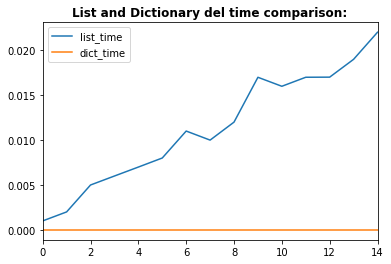

In [17]:
title = 'List and Dictionary del time comparison:'
names = ['list_time', 'dict_time']
plotLines(l_time, d_time, title=title, names=names)

**Given a list of numbers in random order, write an algorithm that works in  $𝑂(𝑛𝑙𝑜𝑔(𝑛))$  to find the  $𝑘$th smallest number in the list. Note that  $𝑂(𝑛𝑙𝑜𝑔(𝑛))$  in quick-sort simply means doing roughly $𝑛$ comparisons in $𝑙𝑜𝑔(𝑛)$ steps.**

In [18]:
def n_log_n(start, stop):
    """Method to display the O(nlog(n))
        execution on a list of random numbers
    """
    times = []
    kays = []
    
    def sort_(arr):
        lent = len(arr)
        while True:
            if arr == sorted(arr):
                break
            for i in range(lent):
                if arr[i] > arr[i+1]:
                    arr[i], arr[i+1] = arr[i+1], arr[i]
                    break
        return arr
    
    for i in range(start, stop+1, start):
        lyst = [randrange(i) for k in range(i)]
        k = randrange(i)
        start = time.time()
        lyst = sort_(lyst)
        duration = time.time()-start
        times.append(round(duration, 4))
        kays.append(lyst[k])
        
        print('Len: %d, Sort-Time: %5.4f'%(i, duration))
        
    return times

In [19]:
sort_times = n_log_n(100, 1000)

Len: 100, Sort-Time: 0.0700
Len: 200, Sort-Time: 0.3948
Len: 300, Sort-Time: 1.6370
Len: 400, Sort-Time: 3.2940
Len: 500, Sort-Time: 7.1948
Len: 600, Sort-Time: 12.6256
Len: 700, Sort-Time: 21.4782
Len: 800, Sort-Time: 30.7620
Len: 900, Sort-Time: 48.1021
Len: 1000, Sort-Time: 59.0640


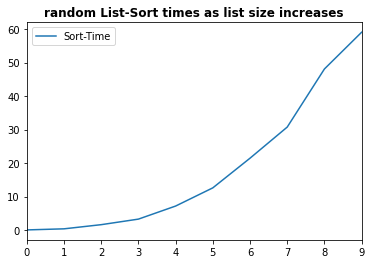

In [20]:
title = 'random List-Sort times as list size increases'
names = ['Sort-Time']
plotLines(sort_times, title=title, names=names)

**5. Can you improve the algorithm from the previous problem to be linear? Explain.**

Sorting algorithms generally take an execution time of $O(nlog(n))$ or in worse cases up to $O(n^2)$.

In [21]:
def n_log_n2(start, stop):
    """Method to display the O(n)
        execution on a list of random numbers
    """
    times = []
    
    for i in range(start, stop+1, start):
        lyst = [randrange(i) for k in range(i)]
        start = time.time()
        lyst = sorted(lyst)
        duration = time.time()-start
        times.append(round(duration, 4))
        
        print('Len: %d, Sort-Time: %5.4f'%(i, duration))
        
    return times

In [22]:
sort_times2 = n_log_n2(10000, 200000)

Len: 10000, Sort-Time: 0.0030
Len: 20000, Sort-Time: 0.0070
Len: 30000, Sort-Time: 0.0130
Len: 40000, Sort-Time: 0.0160
Len: 50000, Sort-Time: 0.0200
Len: 60000, Sort-Time: 0.0290
Len: 70000, Sort-Time: 0.0360
Len: 80000, Sort-Time: 0.0380
Len: 90000, Sort-Time: 0.0420
Len: 100000, Sort-Time: 0.0460
Len: 110000, Sort-Time: 0.0560
Len: 120000, Sort-Time: 0.0570
Len: 130000, Sort-Time: 0.0730
Len: 140000, Sort-Time: 0.0789
Len: 150000, Sort-Time: 0.0730
Len: 160000, Sort-Time: 0.0780
Len: 170000, Sort-Time: 0.0949
Len: 180000, Sort-Time: 0.0920
Len: 190000, Sort-Time: 0.0999
Len: 200000, Sort-Time: 0.1019


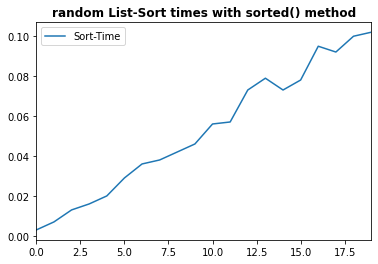

In [23]:
title = 'random List-Sort times with sorted() method'
names = ['Sort-Time']
plotLines(sort_times2, title=title, names=names)